# Resources
https://www.wnycstudios.org/podcasts/radiolab/segments/104010-one-good-deed-deserves-another

https://fivethirtyeight.com/features/how-to-win-a-trade-war/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from DefaultBots import *     # {Player, TitForTat, Satan, Jesus, Arbitrary, MassiveRetalitoryStrike, Tester}
from DylanBots import *       # {HotStartOpportunist, HotStartCooperatorWithGrudge, RetalitoryCooperator, BiasedStatisticalStriker}
from EricBots import *        # {Calvin, Susan, Christy, Eric}
from DanBots import *         # {FlipACoin, SICKO_MODE, Lawful_Neutral, Chaotic_Neutral, Neutral_Evil*}
from LindaBots import *       # {GrumpySquidward, BandwagonerSpongebob}
from JacobBots import *       # {TimeKeeper}
from ShishirBots import *     # {TatForTit, GTT}
from MasonBots import *       # {Mason1, Mason2}
from StellaBots import *      # {ChaoticNice, LawfulGood}

In [3]:
def run_one_game(player1, player2, player1_prev_choices, player2_prev_choices):
    
    p1_ans = player1.evaluate_round(player2_prev_choices)
    p2_ans = player2.evaluate_round(player1_prev_choices)
    
    return p1_ans, p2_ans
    
def run_many_games(player1, player2, n_games=200, verbose=False):
    outcome_array = np.zeros(n_games)
    p1_choices    = np.array([])
    p2_choices    = np.array([])
    
    for i in np.arange(n_games):
        p1_choice, p2_choice = run_one_game(player1, player2, p1_choices, p2_choices)
        p1_choices = np.append(p1_choices, p1_choice)
        p2_choices = np.append(p2_choices, p2_choice)
        
        p1_defect = (p1_choice == 1)
        p2_defect = (p2_choice == 1)
        
        outcome = -1
        if (p1_defect and p2_defect):
            outcome =  0
        if (p1_defect and not p2_defect):
            outcome =  1
        if (not p1_defect and p2_defect):
            outcome =  2
        if (not p1_defect and not p2_defect):
            outcome =  3
        outcome_array[i] = outcome
    
    if (verbose):
        print("Player",player1.name,"chose:",p1_choices)
        print("Player",player2.name,"chose:",p2_choices)
    return outcome_array

def determine_winner(player1, player2, outcome_array, verbose=True):
    p1_wins = np.sum(outcome_array == 1)
    p2_wins = np.sum(outcome_array == 2)
    both_lose = np.sum(outcome_array == 0) # both defect
    both_win  = np.sum(outcome_array == 3) # both remain
    
    pts_both_defect   = 0.0
    pts_both_remain   = 1.0
    pts_opposite_win  = 2.0
    pts_opposite_lose = 0.0
    
    p1_score = p1_wins*pts_opposite_win + both_win*pts_both_remain + both_lose*pts_both_defect + p2_wins*pts_opposite_lose
    p2_score = p2_wins*pts_opposite_win + both_win*pts_both_remain + both_lose*pts_both_defect + p1_wins*pts_opposite_lose
    
    if   (p1_score > p2_score):
        if (verbose):
            print("The winner is:",player1.name,", with a score of",p1_score,"out of 400 total (",100*p1_score/400.,"%)")
            print("Loser (",player2.name,") scored:",p2_score)
            print(player1.name,"beat",player2.name,"by",p1_score-p2_score)
        return player1, p1_score, p2_score
    elif (p2_score > p1_score):
        if (verbose):
            print("The winner is:",player2.name,", with a score of",p2_score,"out of 400 total (",100*p2_score/400.,"%)")
            print("Loser (",player1.name,") scored:",p1_score)
            print(player1.name,"lost to",player2.name,"by",p1_score-p2_score)
        return player2, p1_score, p2_score
    else:
        if (verbose):
            print("Tie, both received",p1_score,"points")
        return Player(), p1_score, p2_score

Tie, both received 200.0 points


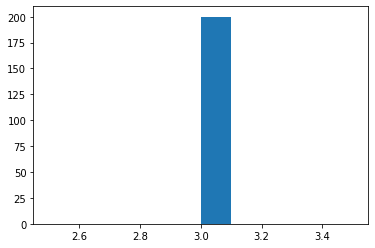

In [24]:
# Example of head-to-head competition
_p1 = Lawful_Neutral(1)
_p2 = LawfulGood(2)
results = run_many_games(_p1,_p2)
winner, p1_score, p2_score = determine_winner(_p1,_p2,results)
n, bins, patches = plt.hist(results)

In [5]:
N_bots       = 28

def MakeBotArray(idx):
    temp_array = np.zeros(N_bots, dtype=object)
    # Default Bots - 6
    temp_array[ 0] = TitForTat(idx)
    temp_array[ 1] = Satan(idx)
    temp_array[ 2] = Jesus(idx)
    temp_array[ 3] = Arbitrary(idx)
    temp_array[ 4] = MassiveRetalitoryStrike(idx)
    temp_array[ 5] = Tester(idx)
    # Dylan Bots - 4 
    temp_array[ 6] = HotStartOpportunist(idx)
    temp_array[ 7] = HotStartCooperatorWithGrudge(idx)
    temp_array[ 8] = RetalitoryCooperator(idx)
    temp_array[ 9] = BiasedStatisticalStriker(idx)
    # Eric Bots - 4
    temp_array[10] = Calvin(idx)
    temp_array[11] = Susan(idx)
    temp_array[12] = Christy(idx)
    temp_array[13] = Eric(idx)
    # Dan Bots - 5
    temp_array[14] = FlipACoin(idx)
    temp_array[15] = SICKO_MODE(idx)
    temp_array[16] = Lawful_Neutral(idx)
    temp_array[17] = Chaotic_Neutral(idx)
    temp_array[18] = Neutral_Evil(idx)
    # Linda Bots - 2
    temp_array[19] = GrumpySquidward(idx)
    temp_array[20] = BandwagonerSpongebob(idx)
    # Jacob Bots - 1
    temp_array[21] = TimeKeeper(idx)
    # Shishir Bots - 2
    temp_array[22] = TatForTit(idx)
    temp_array[23] = GTT(idx)
    # Mason Bots - 2
    temp_array[24] = Mason1(idx)
    temp_array[25] = Mason2(idx)
    # Stella Bots - 1
    temp_array[26] = ChaoticNice(idx)
    temp_array[27] = LawfulGood(idx)
    return temp_array

BotArray1 = MakeBotArray(1)
BotArray2 = MakeBotArray(2)

In [7]:
def RunTheGauntlet(p1, VERBOSE=False):
    p2_array       = BotArray2
    score_array_1  = np.zeros(N_bots)
    score_array_2  = np.zeros(N_bots)
    oppname_arr    = np.zeros(N_bots, dtype=object)

    for i in np.arange(N_bots):
        results = run_many_games(p1,p2_array[i])
        winner, p1_score, p2_score = determine_winner(p1,p2_array[i],results,verbose=False)
        score_array_1[i] = p1_score
        score_array_2[i] = p2_score
        oppname_arr[i]   = p2_array[i].name
        if VERBOSE:
            if   (winner.name == p1.name):
                print(p1.name, "wins vs" , p2_array[i].name, "scoring", p1_score, "points (", p2_score, ")" )
            elif (winner.name == p2_array[i].name):
                print(p1.name, "loses vs", p2_array[i].name, "scoring", p1_score, "points (", p2_score, ")" )
            else:
                print(p1.name, "ties wth", p2_array[i].name, "scoring", p1_score, "points (", p2_score, ")" )
    return p1.name, oppname_arr, score_array_1, score_array_2

In [8]:
_p1 = TitForTat()
name, opp_names, scores, opp_scores = RunTheGauntlet(_p1)

scores = np.append(scores, np.sum(scores))
opp_names = np.append(opp_names, "TOTAL")
score_data = np.array([scores])

In [9]:
# Generate a pandas dataframe using the output for player1's guantlet
# here, we're indexing by the name of player1, and each column is player2's name
# the entry in each cell is the score for player1
df = pd.DataFrame(score_data, columns=opp_names, index=[name])
df.loc[name]

tit-for-tat-2                            200.0
satan-2                                    0.0
jesus-2                                  200.0
arbitrary-2                              151.0
massive-retaliatory-strike-2             200.0
tester-2                                 150.0
hot-start-opportunist-2                  200.0
hot-start-cooperator-with-a-grudge-2     200.0
retalitory-cooperator-2                  200.0
biased-statistical-striker-2             200.0
calvin-2                                 200.0
susan-2                                  200.0
christy-2                                200.0
eric-2                                   200.0
flip-a-coin-2                            153.0
sicko-mode-2                             200.0
lawful-neutral-2                         200.0
chaotic-neutral-2                        150.0
neutral-evil-2                           199.0
grumpy-squidward-2                         0.0
bandwagoner-spongebob-2                  200.0
time-keeper-2

In [28]:
_p1 = BotArray1[0]

# Run the first trial of the gauntlet
name, opp_names, scores, opp_scores = RunTheGauntlet(_p1)

# Create a dictionary for the result of each mathcup
p1_dict = {'player1': name * np.ones(len(scores), dtype=object), 
           'player2': opp_names, 
           'scores1': scores, 
           'scores2': opp_scores}

# Turn the dictionary for this matchup into a dataframe
# Here, we're indexing each matchup, with columns player1 name, player2 name, player1 score, player2 score
# There should be N_bots**2 entries when we're done filling this (after loop)
df = pd.DataFrame(p1_dict)

# Loop over all the other players to be player1 in a gauntlet of matchups
for i in np.arange(N_bots-1):
    # Get the right bot
    _p1 = BotArray1[i+1]
    
    # Run the game
    name, opp_names, scores, opp_scores = RunTheGauntlet(_p1)

    # Create an identical dictionary as above
    p1_dict = {'player1': name * np.ones(len(scores), dtype=object), 
               'player2': opp_names, 
               'scores1': scores, 
               'scores2': opp_scores}
    
    # Turn our new dictionary into a dataframe
    df2 = pd.DataFrame(p1_dict)
    
    # Append the new dataframe to the one we created outside the loop
    df  = df.append(df2)

In [11]:
df # show me the data frame in a pretty table

,player1,player2,scores1,scores2
0,tit-for-tat-1,tit-for-tat-2,200.0,200.0
1,tit-for-tat-1,satan-2,0.0,2.0
2,tit-for-tat-1,jesus-2,200.0,200.0
3,tit-for-tat-1,arbitrary-2,136.0,136.0
4,tit-for-tat-1,massive-retaliatory-strike-2,200.0,200.0
...,...,...,...,...
23,lawful-good-1,GTT-2,200.0,200.0
24,lawful-good-1,mason1-2,1.0,11.0
25,lawful-good-1,mason2-2,200.0,200.0
26,lawful-good-1,chaotic nice-2,199.0,201.0


In [12]:
# Verify there are as many entries as we expect
# Each bot went head to head with every other bot and itself
# So we expect there to be N_bots*N_bots rows in our dataframe
print(len(df))
print(N_bots*N_bots)

784
784


In [13]:
# Let's look at a specific player
p1_name_now = "arbitrary-1"
# p1_name_now = "biased-statistical-striker-1"

In [14]:
# Now get the scores for a given player1 in the matchup
p1_scores = df.loc[ df['player1'] == p1_name_now , "scores1"].to_numpy()
print("Total:",np.sum(p1_scores))

Total: 3420.0


In [15]:
# Which players did player1 win against
win_series = df.loc[ (df['player1'] == p1_name_now) & (df['scores1'] > df['scores2']), ["player2","scores1","scores2"]]
N_wins = len(win_series.to_numpy())
print(win_series)
print("Total wins:",N_wins)

                         player2  scores1  scores2
2                        jesus-2    294.0    106.0
5                       tester-2    175.0    125.0
9   biased-statistical-striker-2    217.0    135.0
13                        eric-2    251.0    123.0
16              lawful-neutral-2    194.0    138.0
20       bandwagoner-spongebob-2    283.0    113.0
22                 tat-for-tit-2    154.0    144.0
23                         GTT-2    153.0    133.0
Total wins: 8


In [16]:
# Which players did player1 lose against
loss_series = df.loc[ (df['player1'] == p1_name_now) & (df['scores1'] < df['scores2']), ["player2","scores1","scores2"]]
N_losses = len(loss_series.to_numpy())
print(loss_series)
print("Total losses:",N_losses)

                                 player2  scores1  scores2
1                                satan-2      0.0    212.0
3                            arbitrary-2    144.0    146.0
4           massive-retaliatory-strike-2      2.0    212.0
6                hot-start-opportunist-2    131.0    175.0
7   hot-start-cooperator-with-a-grudge-2    157.0    159.0
10                              calvin-2    144.0    148.0
11                               susan-2    140.0    150.0
12                             christy-2    124.0    148.0
14                         flip-a-coin-2    142.0    156.0
15                          sicko-mode-2      2.0    190.0
17                     chaotic-neutral-2    148.0    166.0
18                        neutral-evil-2      2.0    180.0
19                    grumpy-squidward-2      0.0    186.0
21                         time-keeper-2      1.0    207.0
24                              mason1-2      2.0    226.0
26                        chaotic nice-2      5.0    213

In [17]:
# Which players did player1 tie with
tie_series = df.loc[ (df['player1'] == p1_name_now) & (df['scores1'] == df['scores2']), ["player2","scores1","scores2"]]
N_ties = len(tie_series.to_numpy())
print(tie_series)
print("Total ties:",N_ties)

                    player2  scores1  scores2
0             tit-for-tat-2    139.0    139.0
8   retalitory-cooperator-2    152.0    152.0
25                 mason2-2    146.0    146.0
Total ties: 3


In [18]:
# Did we count all the games
N_games = N_wins+N_losses+N_ties
print("Total competitors:", N_games)
print("That","is" if (N_games==N_bots) else "is not","the right number")

Total competitors: 28
That is the right number


In [29]:
# Let's look for the top 10 bots
total_scores = np.zeros(N_bots)
for i in np.arange(N_bots):
    total_scores[i] = np.sum(df.loc[ df['player1'] == BotArray1[i].name , "scores1"].to_numpy())
arg_ans = np.argsort(total_scores)
sorted_scores = total_scores[arg_ans]

for i in np.arange(10):
    idx = N_bots - 10 + i
    _name = BotArray1[arg_ans[idx]].name
    _score = sorted_scores[idx]
    print("Place\t",N_bots-idx,"\t",_name,"\t",_score,"\t")

Place	 10 	 eric-1 	 3865.0 	
Place	 9 	 neutral-evil-1 	 3869.0 	
Place	 8 	 tester-1 	 3951.0 	
Place	 7 	 tit-for-tat-1 	 4005.0 	
Place	 6 	 massive-retaliatory-strike-1 	 4039.0 	
Place	 5 	 biased-statistical-striker-1 	 4076.0 	
Place	 4 	 GTT-1 	 4209.0 	
Place	 3 	 jesus-1 	 4267.0 	
Place	 2 	 lawful-good-1 	 4451.0 	
Place	 1 	 lawful-neutral-1 	 4540.0 	


In [22]:
arr1 = np.array([5,2,6,89,3,56,8,3,12,6])
print( np.sort(arr1)  )

arg1 = np.argsort(arr1)
print( arg1 )

print( arr1[arg1] )


[ 2  3  3  5  6  6  8 12 56 89]
[1 4 7 0 2 9 6 8 5 3]
[ 2  3  3  5  6  6  8 12 56 89]
